In [1]:
# 2D 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from mpl_toolkits import mplot3d
from matplotlib import cm

In [3]:
#ADI Method
# Heat eq: alpha*(Uxx+Uyy)
alpha = 0.01
x_min, x_max=0, 1
y_min, y_max=0, 1
dt = 0.01
dx = 0.05
dy = dx
r = dt*alpha/(2*dx**2)
number_x = int(1/dx)
number_y = int(1/dy)

print(number_x,number_y)

20 20


In [5]:
X, Y = np.meshgrid(np.linspace(x_min,x_max,number_x),np.linspace(y_min,y_max,number_y))
A = np.logical_and( (X-1/2)**2+(Y-1/2)**2 >= (x_max-x_min)/16, X <= x_max)
B = np.logical_and((X-1/2)**2+(Y-1/2)**2 <= (x_max-x_min)/4, X <= x_max)
U = np.multiply(A,B)*1
U

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0,

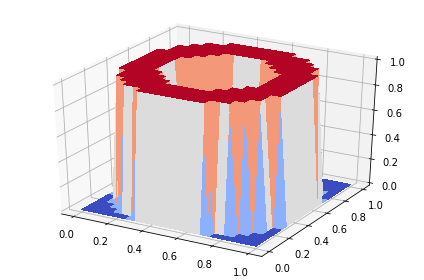

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, U,cmap=cm.coolwarm, linewidth=0, antialiased = False)
plt.tight_layout()

In [11]:
main_diag = (1+2*r)*np.ones((1,number_x))
off_diag = -r*np.ones((1,number_x-1))
a = main_diag.shape[1]
diagonals = [main_diag,off_diag,off_diag]
Lx = sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()
Ix = sparse.identity(number_x).toarray()
lhsA = sparse.kron(Ix,Lx).toarray()
pos1 = np.arange(0,number_x**2,number_x)

for i in range(len(pos1)):
    lhsA[pos1[i],pos1[i]] = 1 + r
pos2 = np.arange(number_x-1,number_x**2,number_x)

for j in range(len(pos2)): 
    lhsA[pos2[j],pos2[j]] = 1 + r 
    

main_diag = (1-r)*np.ones((1,number_y))
off_diag = r*np.ones((1,number_y-1))
a = main_diag.shape[1]
diagonals = [main_diag,off_diag,off_diag]
Rx = sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()
Ix = sparse.identity(number_y).toarray()
rhsA = sparse.kron(Rx,Ix).toarray()
pos3 = np.arange(number_y,number_y**2-number_y)
for k in range(len(pos3)):
    rhsA[pos3[k],pos3[k]] = 1 - 2*r

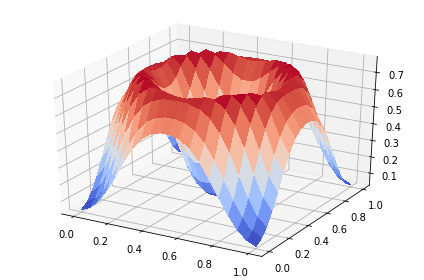

In [12]:
tmax = 0.5
t = 0
n_step = round(tmax/dt)

while t < n_step:
    b_1 = np.flipud(U).reshape(number_x**2,1)
    sol = np.linalg.solve(lhsA, np.matmul(rhsA,b_1))
    U = np.flipud(sol).reshape(number_x,number_x)
    
    b_2 = np.flipud(U).reshape(number_y**2,1)
    sol = np.linalg.solve(lhsA,np.matmul(rhsA,b_2))
    U = np.flipud(sol).reshape(number_y,number_y)
    
    t += 1

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,U,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.tight_layout()

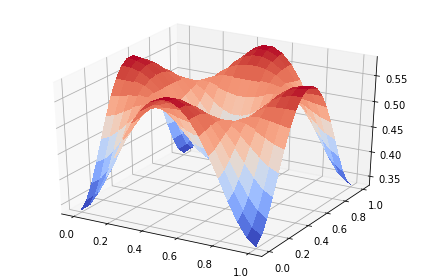

In [13]:
tmax = 1.5
t = 0
n_step = round(tmax/dt)

while t < n_step:
    b_1 = np.flipud(U).reshape(number_x**2,1)
    sol = np.linalg.solve(lhsA, np.matmul(rhsA,b_1))
    U = np.flipud(sol).reshape(number_x,number_x)
    
    b_2 = np.flipud(U).reshape(number_y**2,1)
    sol = np.linalg.solve(lhsA,np.matmul(rhsA,b_2))
    U = np.flipud(sol).reshape(number_y,number_y)
    
    t += 1

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,U,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.tight_layout()

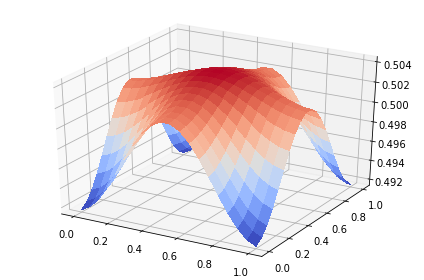

In [14]:
tmax = 5
t = 0
n_step = round(tmax/dt)

while t < n_step:
    b_1 = np.flipud(U).reshape(number_x**2,1)
    sol = np.linalg.solve(lhsA, np.matmul(rhsA,b_1))
    U = np.flipud(sol).reshape(number_x,number_x)
    
    b_2 = np.flipud(U).reshape(number_y**2,1)
    sol = np.linalg.solve(lhsA,np.matmul(rhsA,b_2))
    U = np.flipud(sol).reshape(number_y,number_y)
    
    t += 1

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,U,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.tight_layout()